In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.datasets import load_breast_cancer


why we have used the standard scale becausee all the values we have giving to the input have the standard scale

loading the data

In [19]:
data = load_breast_cancer()

In [21]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
x = df.drop(columns=['target'])

In [22]:
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [24]:
y = df['target']
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.2,random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [29]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

**prediction**

In [30]:
y_predict = model.predict(x_test)

In [35]:
print("Accuracy:",accuracy_score(y_test,y_predict))

Accuracy: 0.9736842105263158


In [36]:
print("confusionMatrix :", confusion_matrix(y_test,y_predict))

confusionMatrix : [[41  2]
 [ 1 70]]


In [37]:
print("Classification Report :" , classification_report(y_test,y_predict))

Classification Report :               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



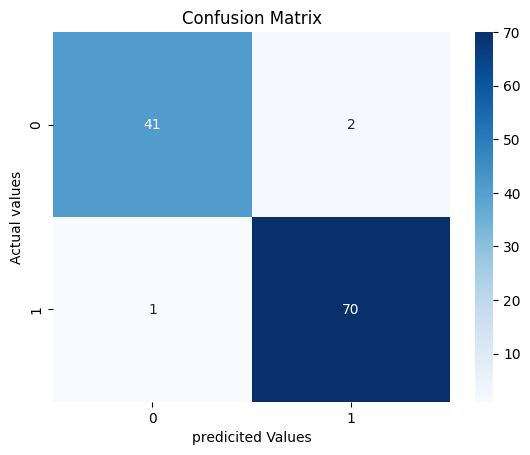

In [39]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,cmap="Blues",fmt='d')
plt.xlabel("predicited Values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix")
plt.show()